# Importando as bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Lendo a base de dados
1. Primeiro contato com a base de dados

Configuração do dataframe

In [2]:
link_df = 'https://raw.githubusercontent.com/matheuss3/promental/main/data/bancosaudemental.csv?token=GHSAT0AAAAAABUPGQX4XLHQ4VQ7FRERQJ7UYUVNTFA'
delimiter = ';'
encoding = 'ISO-8859-1'

In [3]:
df_promental = pd.read_csv(link_df, delimiter=delimiter, encoding=encoding)
df_promental.head()

,SAMPLEID,SC1,SC1_1,SC2,SC2A,SC3,SC3A,SC7,SC8_1,SC8_2,...,notreat12_notsevere,notreat12_anypredisposing,notreat12_service,qids_none,qids_mild,qids_mod,qids_sev,qids_vsev,qids_sevverysev,_merge
0,3201000001-01,32,1,4,4.0,5,1.0,2,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,matched (3)
1,3201000002-01,31,1,8,4.0,5,1.0,3,3,3,...,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,matched (3)
2,3201000003-01,60,1,9,4.0,1,NaN,2,4,4,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,matched (3)
3,3201000004-01,34,1,5,4.0,5,1.0,3,3,2,...,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,matched (3)
4,3201000005-01,84,2,41,4.0,4,5.0,3,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,matched (3)


In [4]:
lines, columns = df_promental.shape
lines, columns

(5037, 2075)

2. Criando um dicionário dos tipos do dataframe

In [5]:
types = {}
for column, type_c in df_promental.dtypes.items():
  if type_c in types:
    types[type_c].append(column)
  else:
    types[type_c] = [column]

for key in types:
  print(f' {len(types[key])} columns {key}')

 71 columns object
 399 columns int64
 1605 columns float64


# Descrevendo os dados

### 1. Criação de um dataframe para descrição de dados
Utilizando o comando describe + *.T* para conseguir a transposta desse DF

In [6]:
df_promental[pd.notnull(df_promental['D1'])]

,SAMPLEID,SC1,SC1_1,SC2,SC2A,SC3,SC3A,SC7,SC8_1,SC8_2,...,notreat12_notsevere,notreat12_anypredisposing,notreat12_service,qids_none,qids_mild,qids_mod,qids_sev,qids_vsev,qids_sevverysev,_merge
0,3201000001-01,32,1,4,4.0,5,1.0,2,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,matched (3)
1,3201000002-01,31,1,8,4.0,5,1.0,3,3,3,...,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,matched (3)
2,3201000003-01,60,1,9,4.0,1,NaN,2,4,4,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,matched (3)
3,3201000004-01,34,1,5,4.0,5,1.0,3,3,2,...,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,matched (3)
4,3201000005-01,84,2,41,4.0,4,5.0,3,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,matched (3)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5027,3214006518-01,31,1,5,4.0,5,1.0,3,3,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,matched (3)
5028,3214006518-02,39,2,5,4.0,5,1.0,1,4,5,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,matched (3)
5029,3214006519-01,55,2,15,4.0,4,5.0,2,4,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,matched (3)
5031,3214006520-02,32,2,7,4.0,1,NaN,3,4,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,matched (3)


In [7]:
df_describe = df_promental.describe(include='all').T

In [8]:
df_describe

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
SAMPLEID,5037,5037,3201000001-01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SC1,5037.0,NaN,NaN,NaN,41.517769,15.005041,18.0,29.0,40.0,52.0,93.0
SC1_1,5037.0,NaN,NaN,NaN,1.565813,0.495699,1.0,1.0,2.0,2.0,2.0
SC2,5037.0,NaN,NaN,NaN,16.527695,43.349269,1.0,5.0,11.0,22.0,999.0
SC2A,5028.0,NaN,NaN,NaN,3.88564,0.364324,1.0,4.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
qids_mod,501.0,NaN,NaN,NaN,0.295409,0.456682,0.0,0.0,0.0,1.0,1.0
qids_sev,501.0,NaN,NaN,NaN,0.321357,0.467464,0.0,0.0,0.0,1.0,1.0
qids_vsev,501.0,NaN,NaN,NaN,0.263473,0.440957,0.0,0.0,0.0,1.0,1.0
qids_sevverysev,501.0,NaN,NaN,NaN,0.58483,0.493244,0.0,0.0,1.0,1.0,1.0


### 2. Adicionando coluna com a porcentagem de nulos

In [9]:
amount_nulls = (df_promental.isnull().sum() / lines) * 100
df_describe['nulls %'] = amount_nulls

### % Nulos entre os entrevistados que responderam o questionário de depression

In [10]:
amount_nulls_depression = (df_promental[pd.notnull(df_promental['D1'])].isnull().sum() / len(df_promental[pd.notnull(df_promental['D1'])])) * 100
df_describe['nulls % *'] = amount_nulls_depression

### 3. Adicionando coluna com os tipos de dados de cada coluna
Através do comando dtypes no dataframe original

In [11]:
df_describe['tipos'] = df_promental.dtypes

In [12]:
df_describe

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,nulls %,nulls % *,tipos
SAMPLEID,5037,5037,3201000001-01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,object
SC1,5037.0,NaN,NaN,NaN,41.517769,15.005041,18.0,29.0,40.0,52.0,93.0,0.000000,0.000000,int64
SC1_1,5037.0,NaN,NaN,NaN,1.565813,0.495699,1.0,1.0,2.0,2.0,2.0,0.000000,0.000000,int64
SC2,5037.0,NaN,NaN,NaN,16.527695,43.349269,1.0,5.0,11.0,22.0,999.0,0.000000,0.000000,int64
SC2A,5028.0,NaN,NaN,NaN,3.88564,0.364324,1.0,4.0,4.0,4.0,4.0,0.178678,0.137033,float64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
qids_mod,501.0,NaN,NaN,NaN,0.295409,0.456682,0.0,0.0,0.0,1.0,1.0,90.053603,83.247688,float64
qids_sev,501.0,NaN,NaN,NaN,0.321357,0.467464,0.0,0.0,0.0,1.0,1.0,90.053603,83.247688,float64
qids_vsev,501.0,NaN,NaN,NaN,0.263473,0.440957,0.0,0.0,0.0,1.0,1.0,90.053603,83.247688,float64
qids_sevverysev,501.0,NaN,NaN,NaN,0.58483,0.493244,0.0,0.0,1.0,1.0,1.0,90.053603,83.247688,float64


### 4. Removendo colunas que possuem +50% dos seus valores nulos
Ainda sobraram 791 colunas no dataframe

In [13]:
remove_percent = 70

In [14]:
df_describe[df_describe['nulls % *'] > remove_percent]

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,nulls %,nulls % *,tipos
CC2,50.0,NaN,NaN,NaN,2.12,0.91785,1.0,1.0,2.0,3.0,3.0,99.007346,98.869476,float64
CC2A01,50.0,NaN,NaN,NaN,5.76,3.347616,1.0,2.25,5.5,9.75,10.0,99.007346,98.869476,float64
CC2A02,5.0,NaN,NaN,NaN,8.6,1.949359,6.0,7.0,10.0,10.0,10.0,99.900735,99.897225,float64
CC2A03,2.0,NaN,NaN,NaN,10.0,0.0,10.0,10.0,10.0,10.0,10.0,99.960294,99.931483,float64
CC2A04,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,100.000000,float64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
qids_mild,501.0,NaN,NaN,NaN,0.101796,0.302683,0.0,0.0,0.0,0.0,1.0,90.053603,83.247688,float64
qids_mod,501.0,NaN,NaN,NaN,0.295409,0.456682,0.0,0.0,0.0,1.0,1.0,90.053603,83.247688,float64
qids_sev,501.0,NaN,NaN,NaN,0.321357,0.467464,0.0,0.0,0.0,1.0,1.0,90.053603,83.247688,float64
qids_vsev,501.0,NaN,NaN,NaN,0.263473,0.440957,0.0,0.0,0.0,1.0,1.0,90.053603,83.247688,float64


In [15]:
columns_nulls = df_describe[df_describe['nulls % *'] > remove_percent].index
df_promental.drop(columns=columns_nulls, inplace=True)
df_promental

,SAMPLEID,SC1,SC1_1,SC2,SC2A,SC3,SC3A,SC7,SC8_1,SC8_2,...,notreat12_inconvenient,notreat12_anyenabling,notreat12_handleown,notreat12_ineffective,notreat12_stigma,notreat12_getbetter,notreat12_notsevere,notreat12_anypredisposing,notreat12_service,_merge
0,3201000001-01,32,1,4,4.0,5,1.0,2,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,matched (3)
1,3201000002-01,31,1,8,4.0,5,1.0,3,3,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,matched (3)
2,3201000003-01,60,1,9,4.0,1,NaN,2,4,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,matched (3)
3,3201000004-01,34,1,5,4.0,5,1.0,3,3,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,matched (3)
4,3201000005-01,84,2,41,4.0,4,5.0,3,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,matched (3)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5032,3214006521-01,40,2,3,4.0,1,NaN,2,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,matched (3)
5033,3214006522-01,24,1,16,3.0,5,5.0,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,matched (3)
5034,3214006523-01,57,2,1,4.0,5,5.0,2,3,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,matched (3)
5035,3214006524-01,19,1,30,3.0,5,5.0,2,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,matched (3)


In [16]:
for column in columns_nulls:
  if ('D' == column[0]):
    print(column)

D26_YESC
D1B
D2
D9
D9A1
D9A2
D10
D11
D14
D14A
D15
D22C
D22D
D22D1
D23A02
D23A03
D23A04
D23A05
D23A06
D23A07
D23A08
D23A09
D23A10
D23A11
D23A12
D23A13
D23A14
D23A15
D23A16
D23A17
D23A18
D26B
D26C
D26D
D26D1
D26F
D26F1
D26H
D26K
D26M
D26N
D26O
D26Q
D26V
D26W_1
D26DD
D26EE
D29B
D29C1
D37
D37A
D37B
D37C
D37CA
D37F_1
D37F_2
D37F_3
D37H_1
D37H_2
D37I_1
D37I_2
D37K
D37L
D37M_1
D37M_2
D37N_1
D37N_2
D37P
D38_1
D38A
D38A_1
D38A_2
D38A_3_5
D38A_3A_
D38A_5
D38A_6
D38A_7A
D38A_7B
D38A_8
D38A_9
D38B
D38B_1
D38C
D39A
D39B
D40
D41
D42
D42_1
D43
D44
D45
D46
D47
D48
D49
D50
D54
D55
D56
D57
D58
D59
D59A
D60
D61
D62_1
D62_2
D64A
D64B
D64C
D64D
D64E
D64F
D64G
D64H
D64I
D64J
D64K
D64L
D64M
D64N
D66A
D66B
D66C
D66D
D67
D68
D72A
D84
D84A
D84B
D84C
D86
D87
D87A
D89


In [17]:
df_describe = df_describe[df_describe['nulls %'] <= remove_percent]
df_describe

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,nulls %,nulls % *,tipos
SAMPLEID,5037,5037,3201000001-01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,object
SC1,5037.0,NaN,NaN,NaN,41.517769,15.005041,18.0,29.0,40.0,52.0,93.0,0.000000,0.000000,int64
SC1_1,5037.0,NaN,NaN,NaN,1.565813,0.495699,1.0,1.0,2.0,2.0,2.0,0.000000,0.000000,int64
SC2,5037.0,NaN,NaN,NaN,16.527695,43.349269,1.0,5.0,11.0,22.0,999.0,0.000000,0.000000,int64
SC2A,5028.0,NaN,NaN,NaN,3.88564,0.364324,1.0,4.0,4.0,4.0,4.0,0.178678,0.137033,float64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
notreat12_getbetter,2942.0,NaN,NaN,NaN,0.03705,0.188916,0.0,0.0,0.0,0.0,1.0,41.592218,28.331620,float64
notreat12_notsevere,2942.0,NaN,NaN,NaN,0.03569,0.185548,0.0,0.0,0.0,0.0,1.0,41.592218,28.331620,float64
notreat12_anypredisposing,2942.0,NaN,NaN,NaN,0.267165,0.442555,0.0,0.0,0.0,1.0,1.0,41.592218,28.331620,float64
notreat12_service,2942.0,NaN,NaN,NaN,0.835146,0.371112,0.0,1.0,1.0,1.0,1.0,41.592218,28.331620,float64


### 5. Selecionando as colunas relacionadas ao dataset de depressão e definindo a coluna target e a matriz com os atributos

In [18]:
checkpoints = ['D0', 'D88']

In [19]:
depression_columns = []
for column in df_promental.columns:
    if ('SC' in column or 'D' in column[0]) and column not in checkpoints:
        depression_columns.append(column)
depression_columns

['SC1',
 'SC1_1',
 'SC2',
 'SC2A',
 'SC3',
 'SC3A',
 'SC7',
 'SC8_1',
 'SC8_2',
 'SC9',
 'SC19',
 'SC20',
 'SC20A',
 'SC20_1',
 'SC20_2',
 'SC20_3',
 'SC21',
 'SC22',
 'SC23',
 'SC24',
 'SC25',
 'SC25A',
 'SC26',
 'SC26A',
 'SC26B',
 'SC27A',
 'SC27B',
 'SC27C',
 'SC27D',
 'SC27E',
 'SC27F',
 'SC28',
 'SC29',
 'SC29A',
 'SC30',
 'SC31',
 'SC32',
 'SC33',
 'SC33_1',
 'SC33_2',
 'SC33_3',
 'SC34',
 'SC35',
 'D1',
 'D1A',
 'D12',
 'D12A',
 'D13',
 'D16',
 'D17',
 'D18',
 'D19',
 'D20',
 'D21',
 'D22',
 'D22A',
 'D22B',
 'D22B1',
 'D23',
 'D23A01',
 'D24A',
 'D24B',
 'D24C',
 'D24D',
 'D24E',
 'D24F',
 'D25',
 'D26A',
 'D26E',
 'D26G',
 'D26I',
 'D26J',
 'D26L',
 'D26P',
 'D26R',
 'D26S',
 'D26T',
 'D26U',
 'D26W',
 'D26X',
 'D26Y',
 'D26Z',
 'D26AA',
 'D26BB',
 'D26CC',
 'D26FF',
 'D26GG',
 'D26HH',
 'D26II',
 'D27',
 'D27A',
 'D28',
 'D28A',
 'D29',
 'D29A',
 'D29D',
 'D37D',
 'D37E',
 'D37G',
 'D38',
 'D72',
 'D87_1']

In [20]:
count_5 = len(df_promental[df_promental.dsm_mddh == 5]) # Diagnóstico Positivo
count_5

4153

In [21]:
count_1 = len(df_promental[df_promental.dsm_mddh == 1]) # Diagnóstico Negativo
count_1

884

In [41]:
df_promental_balanced = df_promental[df_promental.dsm_mddh == 5].sample(count_1, random_state = 0)
df_promental_balanced = pd.concat([df_promental_balanced,df_promental[df_promental.dsm_mddh == 1]],axis=0)

In [42]:
df_promental_balanced['dsm_mddh'].value_counts()

5    884
1    884
Name: dsm_mddh, dtype: int64

In [82]:
df_promental_balanced.fillna(0, inplace=True)

In [83]:
X = df_promental_balanced[depression_columns] # Criando matriz com os atributos relacionados com depressão
y = df_promental_balanced['dsm_mddh'] # Vetor com coluna target
df_result = df_promental_balanced[depression_columns + ['dsm_mddh']]

In [84]:
X

,SC1,SC1_1,SC2,SC2A,SC3,SC3A,SC7,SC8_1,SC8_2,SC9,...,D28A,D29,D29A,D29D,D37D,D37E,D37G,D38,D72,D87_1
1722,35,2,35,4.0,5,5.0,3,2,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1221,18,2,1,4.0,5,5.0,3,2,2,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4994,30,1,3,4.0,1,0.0,2,1,2,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5009,40,2,2,4.0,2,1.0,3,1,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4193,51,1,10,4.0,1,0.0,1,4,2,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,998.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5018,59,2,8,4.0,3,5.0,3,4,4,2,...,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0
5019,18,1,2,4.0,5,5.0,3,4,4,4,...,2.0,4.0,5.0,2.0,2.0,2.0,2.0,1.0,5.0,1.0
5022,55,2,25,4.0,1,0.0,3,4,4,1,...,1.0,998.0,5.0,2.0,3.0,2.0,2.0,1.0,1.0,1.0
5026,33,2,25,4.0,5,5.0,1,4,4,4,...,2.0,1.0,5.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0


In [85]:
y

1722    5
1221    5
4994    5
5009    5
4193    5
       ..
5018    1
5019    1
5022    1
5026    1
5028    1
Name: dsm_mddh, Length: 1768, dtype: int64

In [86]:
X_describe = X.describe().T
amount_nulls = X.isnull().sum()
X_describe['% nulls'] = amount_nulls * 100 // len(X)
X_describe['column_name'] = X_describe.index
X_describe['types'] = X.dtypes
X_describe

,count,mean,std,min,25%,50%,75%,max,% nulls,column_name,types
SC1,1768.0,41.119910,14.078175,18.0,30.0,40.0,51.0,84.0,0,SC1,int64
SC1_1,1768.0,1.650452,0.476962,1.0,1.0,2.0,2.0,2.0,0,SC1_1,int64
SC2,1768.0,15.355769,34.984168,1.0,5.0,11.0,21.0,998.0,0,SC2,int64
SC2A,1768.0,3.884050,0.384497,0.0,4.0,4.0,4.0,4.0,0,SC2A,float64
SC3,1768.0,2.662896,1.786114,1.0,1.0,2.0,5.0,5.0,0,SC3,int64
...,...,...,...,...,...,...,...,...,...,...,...
D37E,1768.0,0.670814,0.701044,0.0,0.0,1.0,1.0,2.0,0,D37E,float64
D37G,1768.0,0.832579,0.856561,0.0,0.0,1.0,2.0,2.0,0,D37G,float64
D38,1768.0,1.574095,2.084558,0.0,0.0,1.0,5.0,9.0,0,D38,float64
D72,1768.0,1.777715,2.201975,0.0,0.0,1.0,5.0,9.0,0,D72,float64


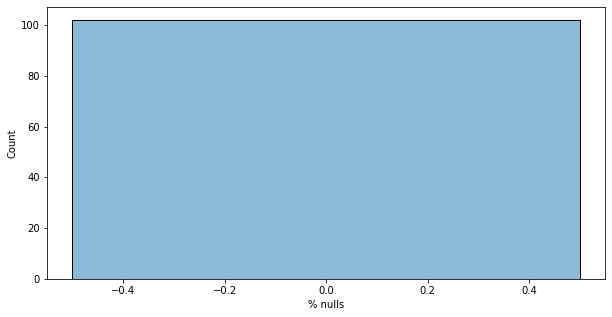

In [87]:
X_describe.groupby(['% nulls']).count()
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(X_describe['% nulls'], ax=ax, kde=True)

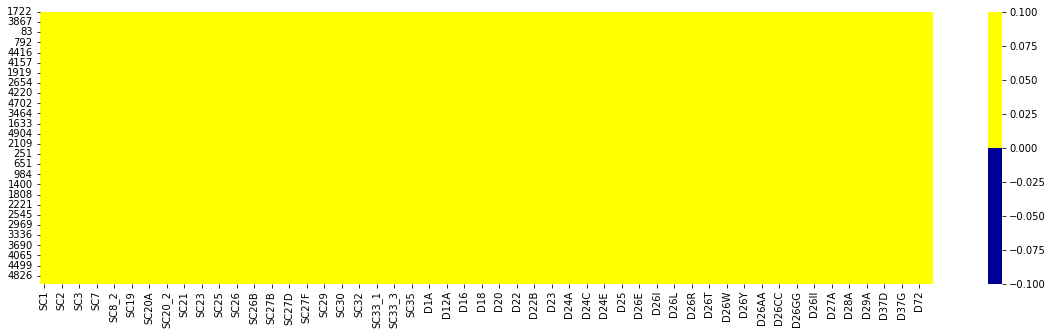

In [88]:
fig, ax = plt.subplots(figsize=(20,5)) 
sns.heatmap(X.isnull(), cmap=sns.color_palette(['#000099', '#ffff00']) ,ax=ax)

### Diagnóstico
5 - Negativo<br>
1 - Positivo

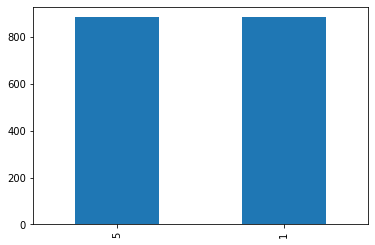

In [89]:
y.value_counts().plot(kind='bar')

In [90]:
# column = input('Coluna: ')
# fig, ax = plt.subplots(figsize=(10,10)) 
# df_result_positive[column].value_counts().plot.barh(ax=ax)
# ax.invert_yaxis()

In [91]:
sc_columns = []
for column in X.columns:
    if ('SC' in column):
        sc_columns.append(column)
sc_columns

['SC1',
 'SC1_1',
 'SC2',
 'SC2A',
 'SC3',
 'SC3A',
 'SC7',
 'SC8_1',
 'SC8_2',
 'SC9',
 'SC19',
 'SC20',
 'SC20A',
 'SC20_1',
 'SC20_2',
 'SC20_3',
 'SC21',
 'SC22',
 'SC23',
 'SC24',
 'SC25',
 'SC25A',
 'SC26',
 'SC26A',
 'SC26B',
 'SC27A',
 'SC27B',
 'SC27C',
 'SC27D',
 'SC27E',
 'SC27F',
 'SC28',
 'SC29',
 'SC29A',
 'SC30',
 'SC31',
 'SC32',
 'SC33',
 'SC33_1',
 'SC33_2',
 'SC33_3',
 'SC34',
 'SC35']

In [92]:
X_depression = X.drop(columns=sc_columns, axis=1)

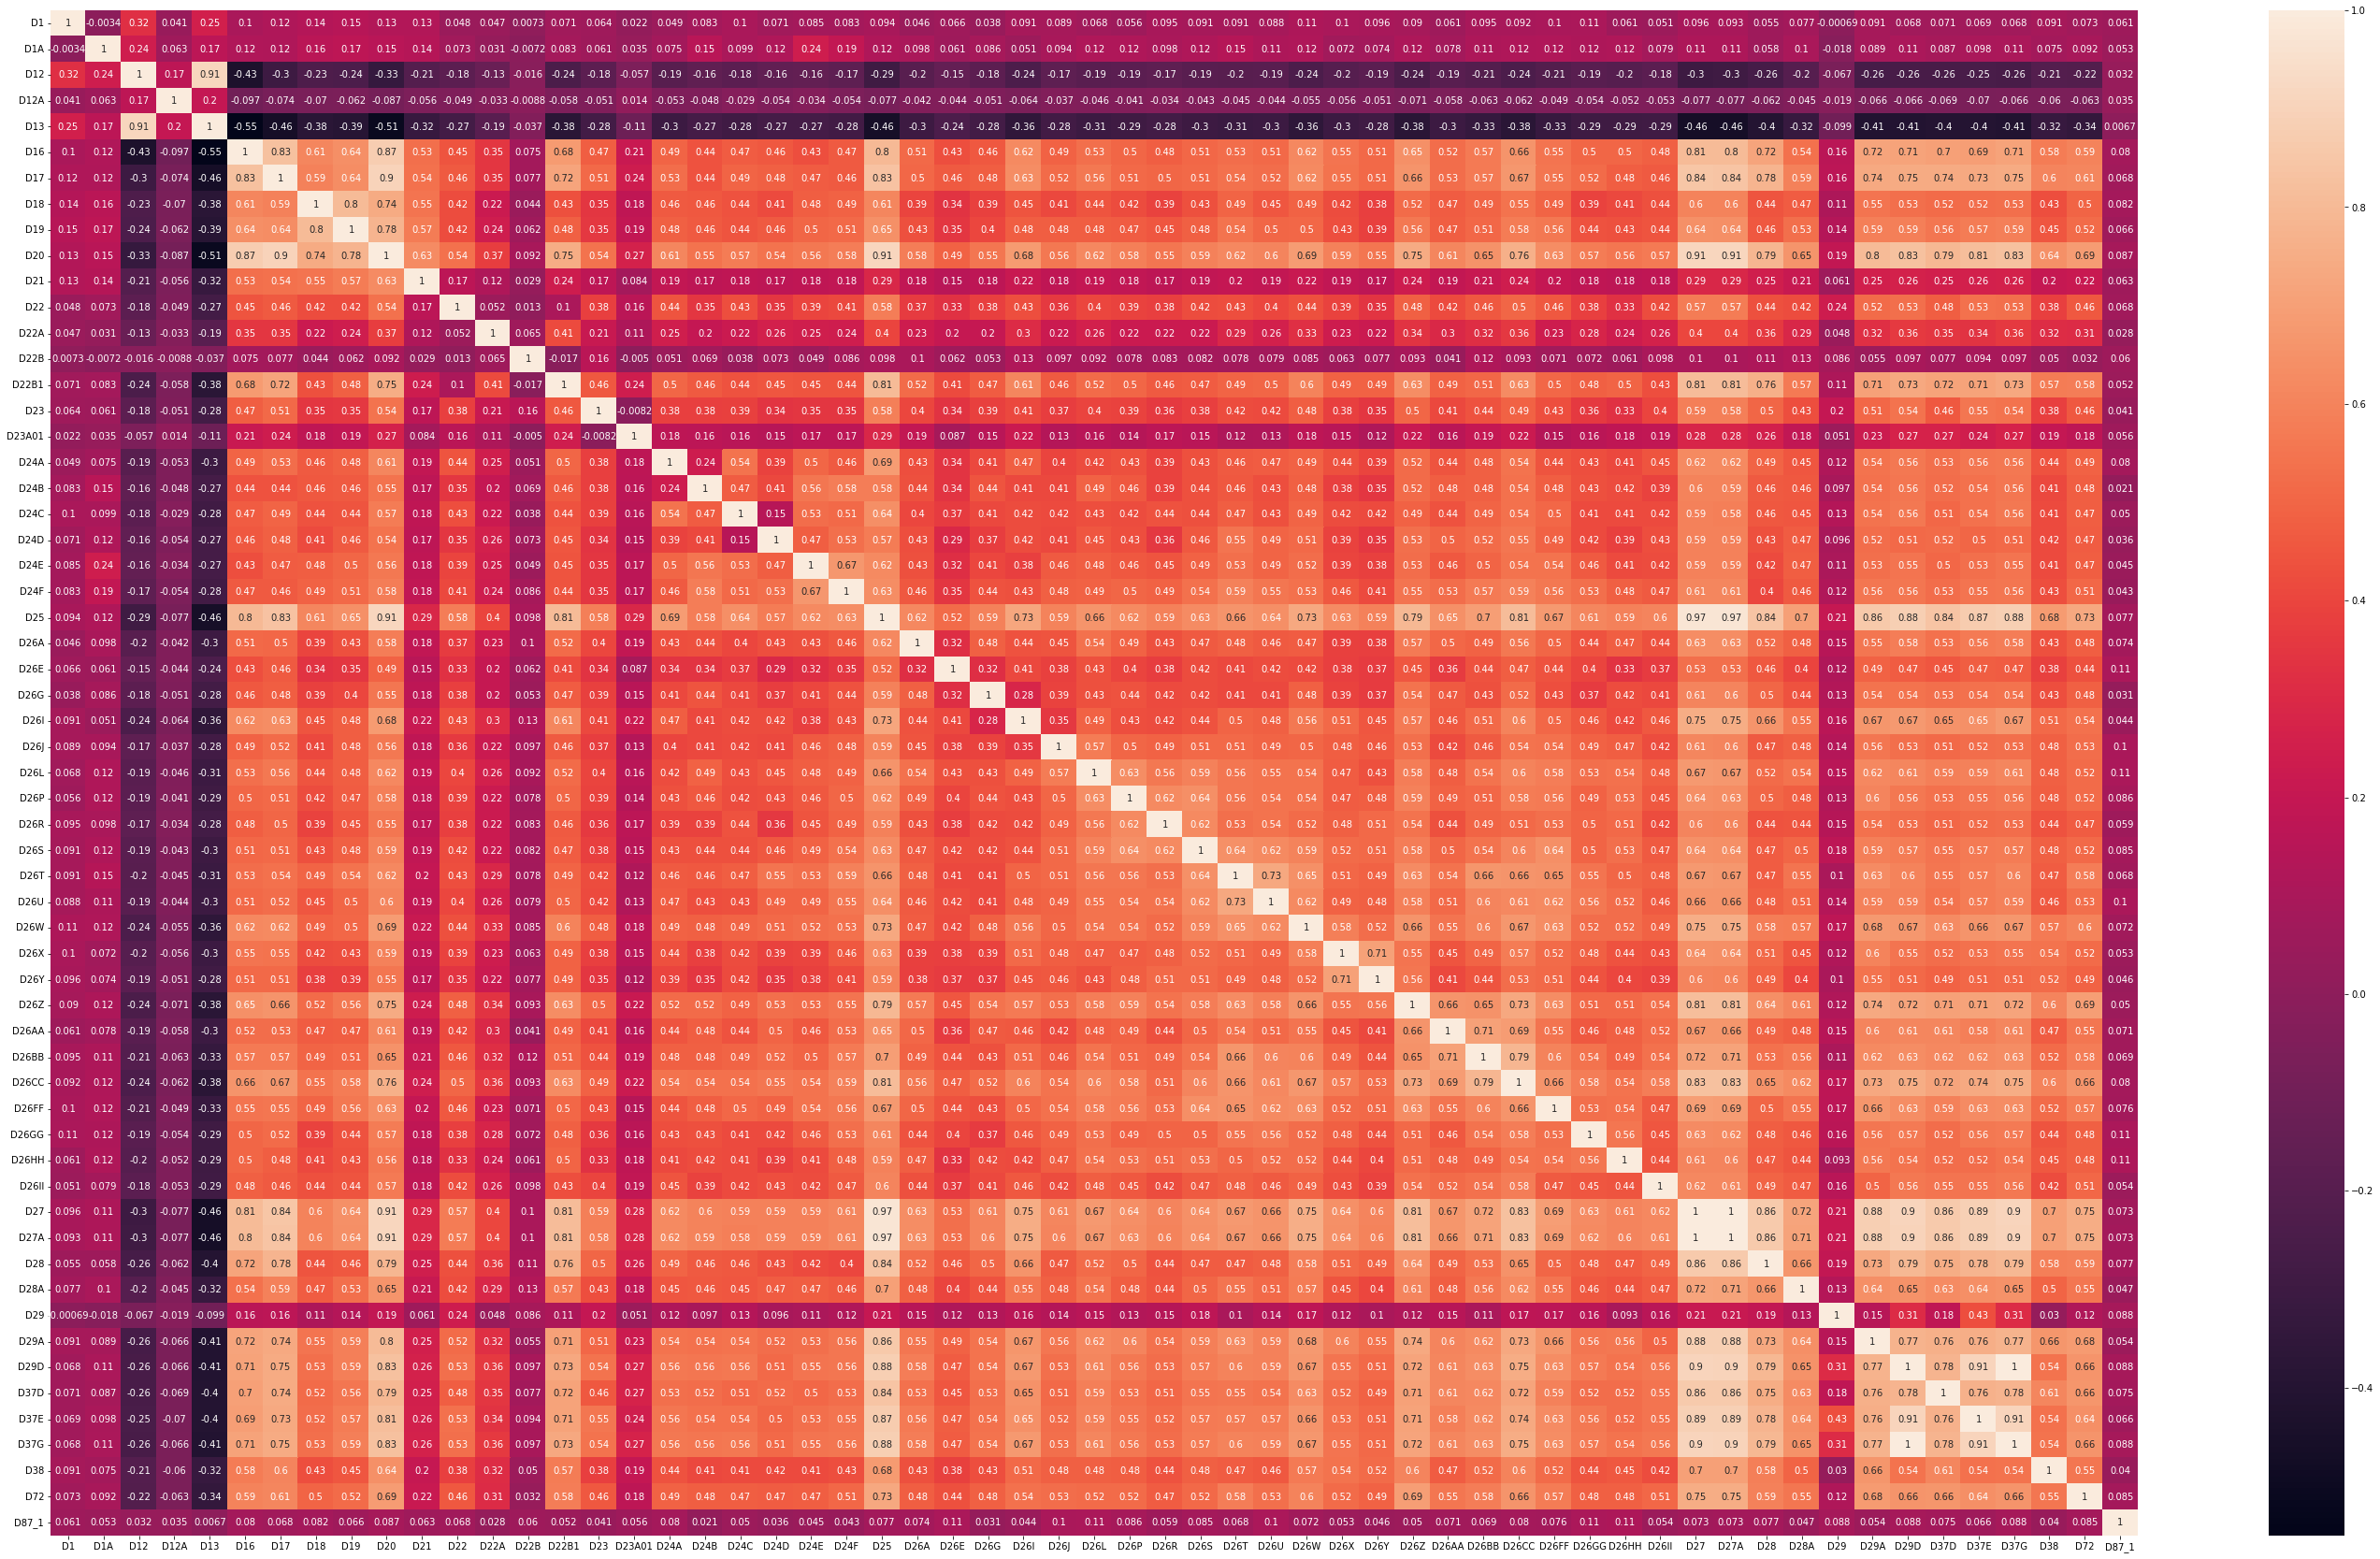

In [93]:
fig, ax = plt.subplots(figsize=(50,30)) 
sns.heatmap(X_depression.corr(), ax=ax, annot=True)
fig.show()

D37G X D29D

In [94]:
X.drop(['D37G'], inplace=True, axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Modelo - RandomForest

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [97]:
X_train.fillna(0, inplace=True)

In [98]:
model = RandomForestClassifier(max_depth=5)

In [99]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [100]:
model.score(X_test, y_test)

0.9510357815442562